# White Wine Quality Prediction

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

### Description: 
#### Importing Data

In [2]:
# Load the dataset
wine_df = pd.read_csv('winequality-white.csv', delimiter=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Description: 
#### Check for missing values

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Description: 
#### Generate frequency table for fixed acidity

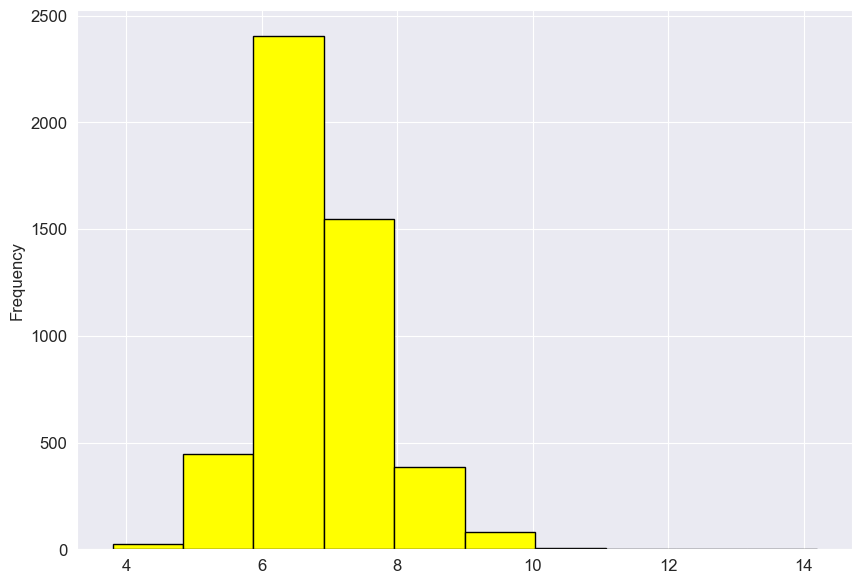

In [4]:
# Generate frequency table for fixed acidity
plt.hist(wine_df['fixed acidity'], color = 'yellow', edgecolor = 'black')
plt.ylabel('Frequency')
plt.show()

### Result interpretation:
The distribution of fixed acidity appears relatively normal. Majority of fixed acidity values are between 6 and 7.

### Description: 
#### Analyze relationship between fixed acidity and total sulfur dioxide

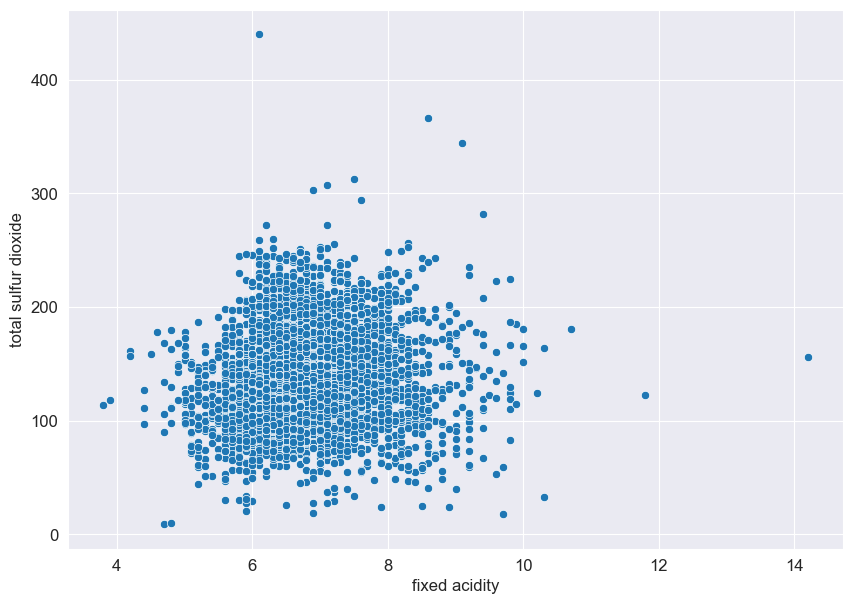

In [5]:
# Scatterplot that depicts the relationship between fixed acidity and total sulfur dioxide
sns.scatterplot(x = 'fixed acidity', y = 'total sulfur dioxide', data = wine_df) 
plt.show()

### Result interpretation:
The are very few outliers present in the scatterplot. Most of the observations appear clustered around the 6 - 8 range for fixed acidity and the 50 - 200 range for total sulfur dioxide.

### Description: 
#### Generate frequency table for citric acid

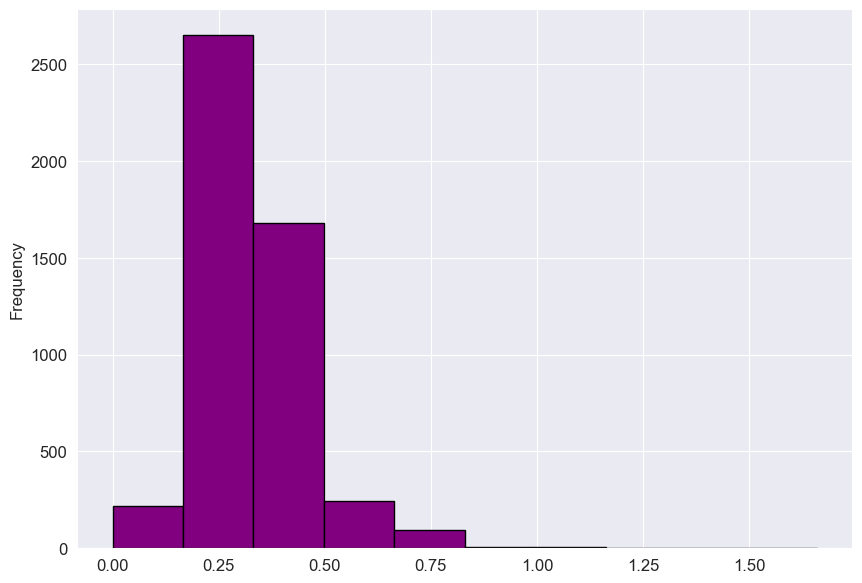

In [6]:
# Generate frequency table for citric acid
plt.hist(wine_df['citric acid'], color = 'purple', edgecolor = 'black')
plt.ylabel('Frequency')
plt.show()

### Result interpretation:
Citric acid also has a relatively normal distribution, with the majority of values around 0.25.

### Description: 
#### Create a heatmap to check for multicollinearity

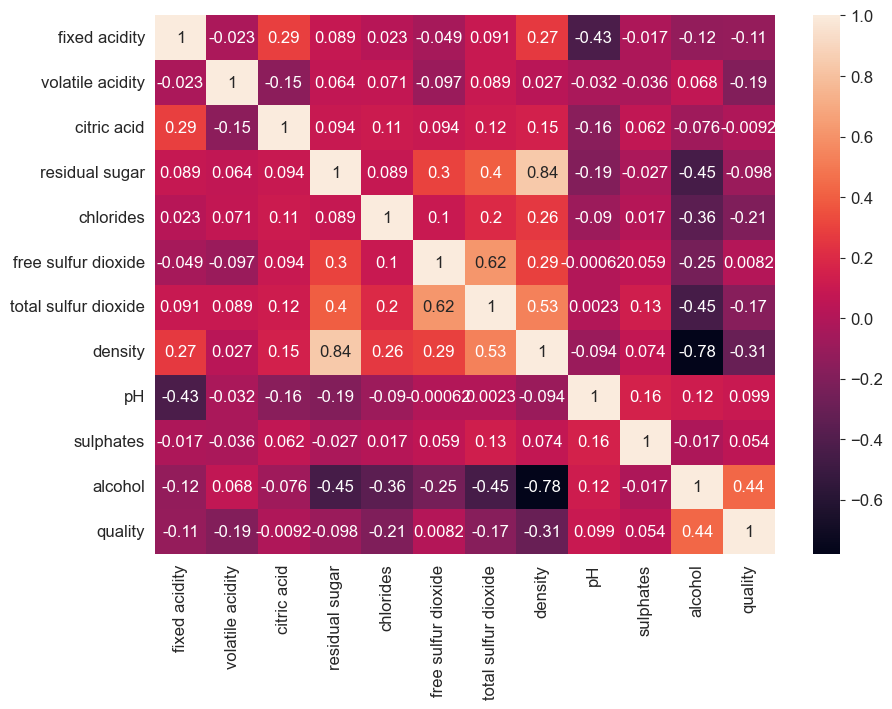

In [7]:
# Check for multicollinearity
sns.heatmap(wine_df.corr(), annot = True)
plt.show()

### Result interpretation:
Although most of the variables appear to have a weak negative or no correlation with the quality of white wine, alcohol has a moderate strong positive correlation with the quality of white wine. This means that alcohol content is more significant in predicting the quality of white wine since it has the strongest positive correlation to quality than the other variables. The heat map also reveals that there is a relatively weak positive correlation between white wine density and fixed acidity. Additionally, there is a relatively strong positive correlation between white wine density and total sulfur dioxide. However, there is a strong negative correlation between white wine alcohol content and density.

### Description: 
#### Create a boxplot to analyze the pH content of white wine

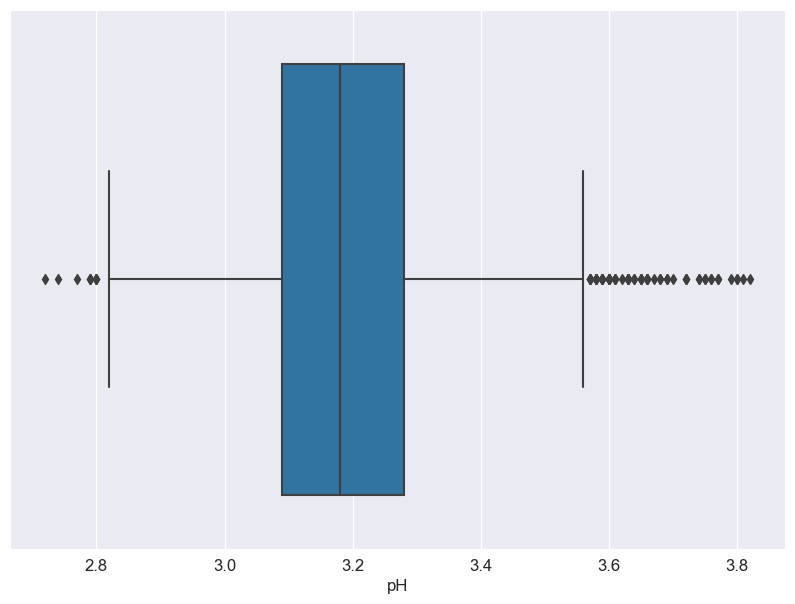

In [8]:
# Create a boxplot for pH
sns.boxplot(x = 'pH', data = wine_df)
plt.show()

### Result interpretation:
The median pH content appears to be at around 3.18, and there are more outliers past the maximum of the boxplot. This results in the box plot being skewed to the right. 

### Description: 
#### Create a lineplot to analyze the relationship between volatile acidity and chloride content in white wine

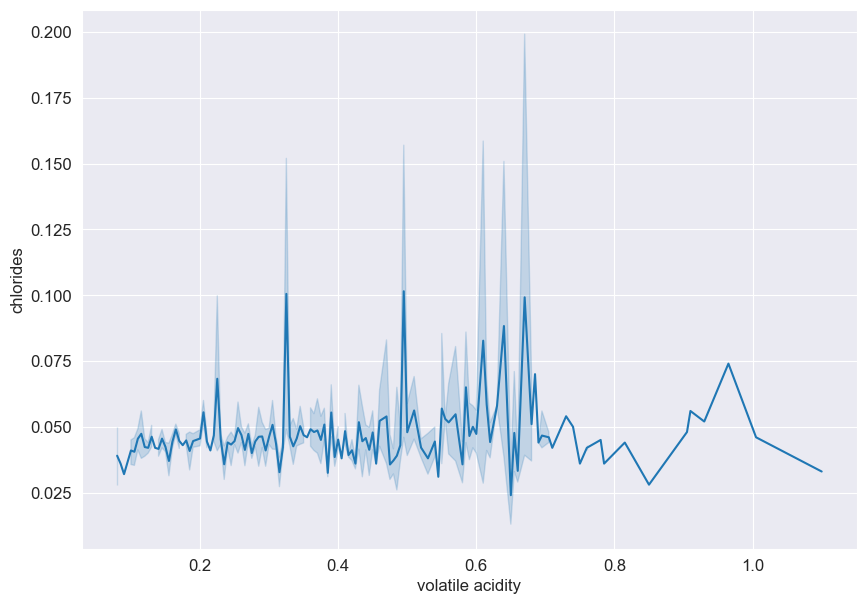

In [9]:
sns.lineplot(x = 'volatile acidity', y = 'chlorides', data = wine_df)
plt.show()

### Result interpretation:
Volatile acidity and chloride content appear to have no correlation with each other. However, certain volatile acidity values are associated with a spike in chloride content.  

### Description: 
#### Scaling the data using StandardScaler

In [10]:
# Separate the predictors and response variable
X_unscaled = wine_df.drop(columns = ['quality'])
y_unscaled = wine_df['quality']

# StandardScaler
scaler_ss = StandardScaler()
X_ss = scaler_ss.fit_transform(X_unscaled)
X_ss = pd.DataFrame(X_ss, columns=X_unscaled.columns)

### Result interpretation:
###### Is it necessary to scale the data? What benefits would it provide?
Yes, scaling is important to ensure that all features are in the same range, which helps the machine learning algorithm to learn the relative importance of the different features without giving more weight to the features with larger scales. 
###### Which scaler will you use for this data set (if any), and why? Min Max, Standard, Robust, etc.
StandardScaler is a good choice for this dataset as it scales the features to have a mean of zero and a standard deviation of 1. This helps to center the data and bring all features to the same scale, which is important for many machine learning algorithms. Additionally, StandardScaler assumes that the data is normally distributed, which is often the case for many continuous variables.

### Description: 
#### Since we have numerical variables, we can use binning to convert them to categorical variables.

In [11]:
# loop over each numerical feature and bin them based on deciles
for feature in list(X_ss.columns):
    X_ss[feature + '_binned'] = pd.qcut(X_ss[feature], q=10, labels=False, duplicates='drop')
X_ss.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile acidity_binned,citric acid_binned,residual sugar_binned,chlorides_binned,free sulfur dioxide_binned,total sulfur dioxide_binned,density_binned,pH_binned,sulphates_binned,alcohol_binned
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,...,5,6,9,5,7,7,9,0,3,0
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,...,6,5,2,7,0,4,5,7,5,2
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,...,5,7,5,7,4,1,6,7,3,4
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,...,3,4,6,8,7,8,6,5,2,3
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,...,3,4,6,8,7,8,6,5,2,3


### Description: 
#### Separate binned features from regular features

In [12]:
X_binned = X_ss[['fixed acidity_binned', 'volatile acidity_binned', 'citric acid_binned', 'residual sugar_binned', 'chlorides_binned', 'free sulfur dioxide_binned', 'total sulfur dioxide_binned', 'density_binned', 'pH_binned', 'sulphates_binned', 'alcohol_binned']]
X_binned.head()

,fixed acidity_binned,volatile acidity_binned,citric acid_binned,residual sugar_binned,chlorides_binned,free sulfur dioxide_binned,total sulfur dioxide_binned,density_binned,pH_binned,sulphates_binned,alcohol_binned
0,5,5,6,9,5,7,7,9,0,3,0
1,2,6,5,2,7,0,4,5,7,5,2
2,9,5,7,5,7,4,1,6,7,3,4
3,6,3,4,6,8,7,8,6,5,2,3
4,6,3,4,6,8,7,8,6,5,2,3


### Description: 
#### Create the random forest model

Random Forest Classifier:
Accuracy score: 0.6598639455782312


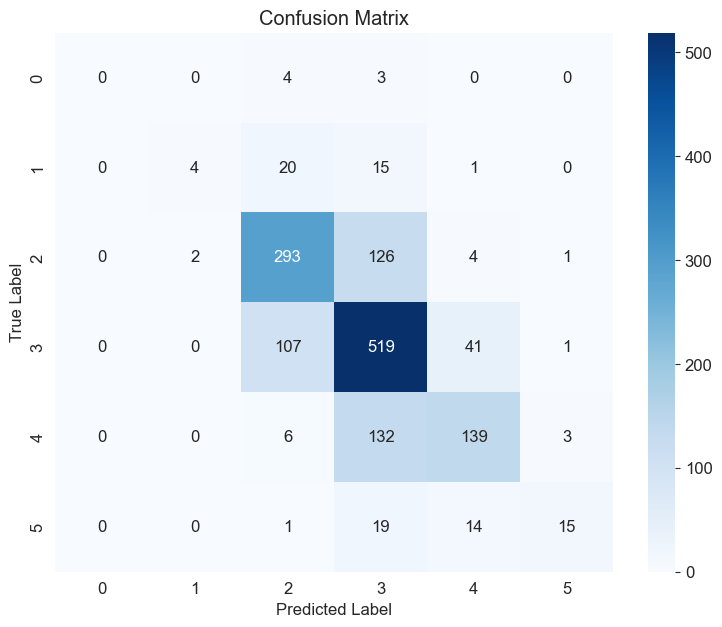

,precision,recall,f1-score,support
3,0.000000,0.000000,0.000000,7.000000
4,0.666667,0.100000,0.173913,40.000000
5,0.679814,0.687793,0.683781,426.000000
6,0.637592,0.776946,0.700405,668.000000
7,0.698492,0.496429,0.580376,280.000000
8,0.750000,0.306122,0.434783,49.000000
accuracy,0.659864,0.659864,0.659864,0.659864
macro avg,0.572094,0.394548,0.428876,1470.000000
weighted avg,0.662930,0.659864,0.646209,1470.000000


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binned, y_unscaled, test_size = 0.3, random_state = 42)

# Create the random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Use the classifier to make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Calculate and print the accuracy score
print("Random Forest Classifier:")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_rf)}")

# Plot the confusion matrix
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap=plt.cm.Blues, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate a classification report
class_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert the classification report to a DataFrame
df_class_report_rf = pd.DataFrame(class_report_rf).transpose()

# Show the classification report
df_class_report_rf

### Result interpretation:
Accuracy could definitely be improved. We binned by quantiles, meaning that each bin receives 10% of the data, but adding more bins and using a different binning technique could improve the accuracy. Still, there doesn't appear to be overfitting to the training data.

### Description: 
#### Create the decision tree model

Accuracy Score: 0.5496598639455782


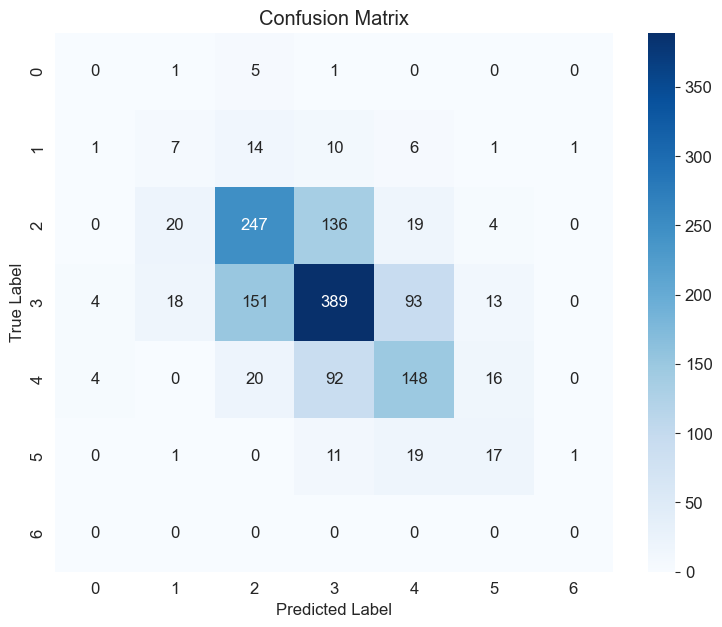

,precision,recall,f1-score,support
3,0.000000,0.000000,0.000000,7.00000
4,0.148936,0.175000,0.160920,40.00000
5,0.565217,0.579812,0.572422,426.00000
6,0.608764,0.582335,0.595256,668.00000
7,0.519298,0.528571,0.523894,280.00000
8,0.333333,0.346939,0.340000,49.00000
9,0.000000,0.000000,0.000000,0.00000
accuracy,0.549660,0.549660,0.549660,0.54966
macro avg,0.310793,0.316094,0.313213,1470.00000
weighted avg,0.554511,0.549660,0.551884,1470.00000


In [17]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(max_depth = 12, criterion='entropy')

modelDT.fit(X_train, y_train)

y_pred_DT = modelDT.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_DT)}")

# Plot the confusion matrix
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, cmap=plt.cm.Blues, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate a classification report
class_report_dt = classification_report(y_test, y_pred_DT, output_dict=True)

# Convert the classification report to a DataFrame
df_class_report_dt = pd.DataFrame(class_report_dt).transpose()

# Show the classification report
df_class_report_dt

### Result interpretation:
Random forest did 10% better. Looking at the confusion matrix, it appears that the decision tree had a good portion of incorrect predictions around the labels of 2 and 3 representing wine qualities of 5 and 6 on the wine quality scale from 3 - 9.

### Description: 
#### Create the naïve bayes model

Accuracy Score: 0.47891156462585033


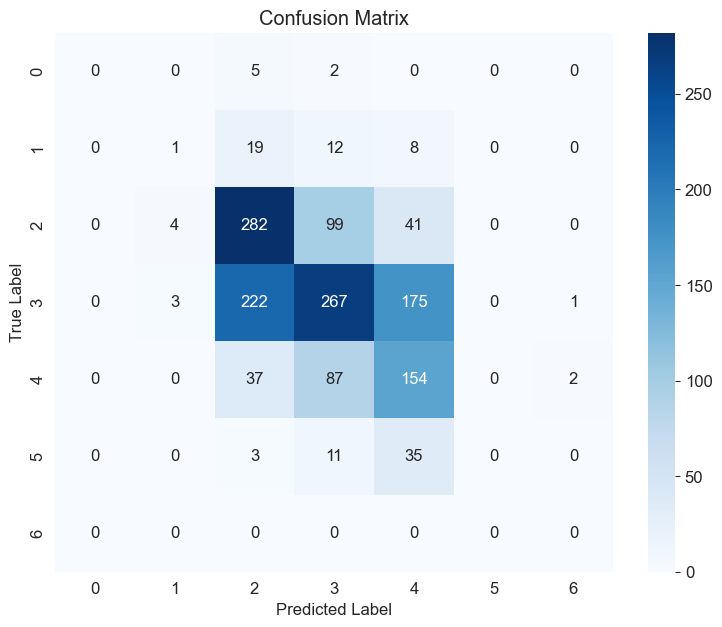

,precision,recall,f1-score,support
3,0.000000,0.000000,0.000000,7.000000
4,0.125000,0.025000,0.041667,40.000000
5,0.496479,0.661972,0.567404,426.000000
6,0.558577,0.399701,0.465969,668.000000
7,0.372881,0.550000,0.444444,280.000000
8,0.000000,0.000000,0.000000,49.000000
9,0.000000,0.000000,0.000000,0.000000
accuracy,0.478912,0.478912,0.478912,0.478912
macro avg,0.221848,0.233810,0.217069,1470.000000
weighted avg,0.472134,0.478912,0.461968,1470.000000


In [15]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
modelNB = GaussianNB()

# Fit the model on the training data
modelNB.fit(X_train, y_train)

# Make predictions on the test data
y_pred_NB = modelNB.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_NB)}")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize=(9,7))
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate a classification report
class_report = classification_report(y_test, y_pred_NB, output_dict=True)

# Convert the classification report to a DataFrame
df_class_report = pd.DataFrame(class_report).transpose()

# Show the classification report
df_class_report

### Result interpretation:
Naive bayes was outperformed by both random forest and decision tree. Random forest and decision tree classifiers can outperform naive Bayes classifiers in situations where the relationship between features and target variables is complex or nonlinear. This is because decision trees and random forests can capture complex interactions and non-linearities between features and target variables, while naive Bayes classifiers assume that features are independent of each other, and that the relationship between features and target variables is linear.